In [30]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os

In [31]:
print("[INFO] loading images...")
#baru = nama datasets
imagePaths = paths.list_images('baru')
data = []
labels = []
 
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
    #normalisasi
	image = np.array(image.resize((66, 66))) / 255.0
	data.append(image)
 
	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

[INFO] loading images...


In [32]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
 
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25)

In [33]:
# define our Convolutional Neural Network architecture
# pengenalan ciri ( ekstraksi fitur dengan melakukan konvolusi input terhadap filter)
model = Sequential()
#input_shape=(66,66, 3) = ukuran gambar
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(66,66, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#flatten = di jadikan 1 dimensi
model.add(Flatten())
#Dense = banyak kelas
model.add(Dense(5))
model.add(Activation("softmax"))

In [34]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=50, batch_size=32)
 
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] training network...
Train on 187 samples, validate on 63 samples
Epoch 1/50
187/187 [==============================] - 1s 7ms/step - loss: 1.6090 - accuracy: 0.1925 - val_loss: 1.5873 - val_accuracy: 0.2698
Epoch 2/50
187/187 [==============================] - 1s 4ms/step - loss: 1.5580 - accuracy: 0.4332 - val_loss: 1.5468 - val_accuracy: 0.4286
Epoch 3/50
187/187 [==============================] - 1s 4ms/step - loss: 1.4947 - accuracy: 0.4599 - val_loss: 1.4611 - val_accuracy: 0.3651
Epoch 4/50
187/187 [==============================] - 1s 4ms/step - loss: 1.3850 - accuracy: 0.5080 - val_loss: 1.3029 - val_accuracy: 0.7302
Epoch 5/50
187/187 [==============================] - 1s 4ms/step - loss: 1.1992 - accuracy: 0.8289 - val_loss: 1.1339 - val_accuracy: 0.7143
Epoch 6/50
187/187 [==============================] - 1s 4ms/step - loss: 0.9338 - accuracy: 0.8449 - val_loss: 0.8653 - val_accuracy: 0.8254
Epoch 7/50
187/187 [==============================] - 1s 4ms/step - loss: 0.

In [35]:
import cv2
import matplotlib.pyplot as plt
image1 = '5-1.jpeg'

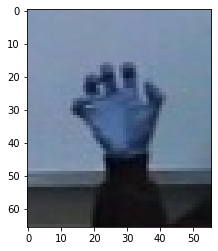

In [36]:
img_array =cv2.imread(image1)
plt.imshow(img_array)
plt.show()

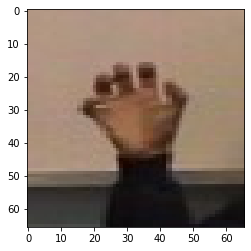

In [37]:
image_testing = Image.open('5-1.jpeg')
image_testing = np.array(image_testing.resize((66,66)))/255.0
image_testing.shape
plt.imshow(image_testing)
plt.show()

In [38]:
image_testing = np.expand_dims(image_testing,axis=0)
print(image_testing.shape)

(1, 66, 66, 3)


In [39]:
output = model.predict(image_testing,1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9998319e-01 9.8895825e-10 1.1036843e-06 2.6003141e-10 1.5686017e-05]]
['5']
